In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
import numpy as np

In [ ]:
data=pd.read_csv("EDA_Lithology_Prediction.csv")

In [ ]:
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [ ]:

data.shape

(133198, 29)

In [ ]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,133198.000000,125805.000000,1.258050e+05,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,17350.000000,91725.000000,100840.000000,132635.000000,93680.000000,97529.000000,130454.000000,12184.000000,56200.000000,105539.000000,101644.000000,1635.000000,13473.000000,38946.000000,133198.000000,133183.000000
mean,1792.944663,451235.640835,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,59.813135,0.355602,4.511845,122.700286,91.608922,12.194539,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168,63261.582892,1.235796
std,739.441515,15299.395264,3.094449e+04,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,25.538669,0.143857,5.092807,34.234879,98.781404,3.143410,45.592228,44.358622,43.000304,0.067312,17.882420,2.261201,14.319902,333.547482,13623.352961,0.480781
min,415.261599,436790.843750,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,-196.869995,-0.023143,1.010027,7.415132,-2.199269,8.500000,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024,30000.000000,1.000000
25%,1182.822400,437640.781250,6.453743e+06,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,41.281138,0.234927,2.857540,87.899776,48.808243,8.500000,9.650485,149.754013,0.007800,-0.007736,0.137800,1.387308,14.260232,0.537328,65000.000000,1.000000
50%,1747.524495,444152.093750,6.463019e+06,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,62.973612,0.382014,3.780121,135.968094,70.282761,12.250001,22.362363,162.537949,0.415419,0.003215,0.152180,2.133351,24.598738,0.879455,65000.000000,1.000000
75%,2413.874901,460442.093750,6.478963e+06,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,73.933750,0.480985,5.098502,147.388626,92.173889,12.250001,35.444058,190.082294,1.118416,0.022928,0.168955,2.860770,33.749100,1.519061,65030.000000,1.000000
max,3272.024000,476770.156250,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,152.516830,0.817310,365.575592,230.432953,526.547302,26.000002,2224.647461,377.327789,10006.789063,0.433157,185.730927,23.590172,86.378632,2000.000000,99000.000000,3.000000


In [ ]:
data['WELL'].nunique()

12

In [ ]:
data['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

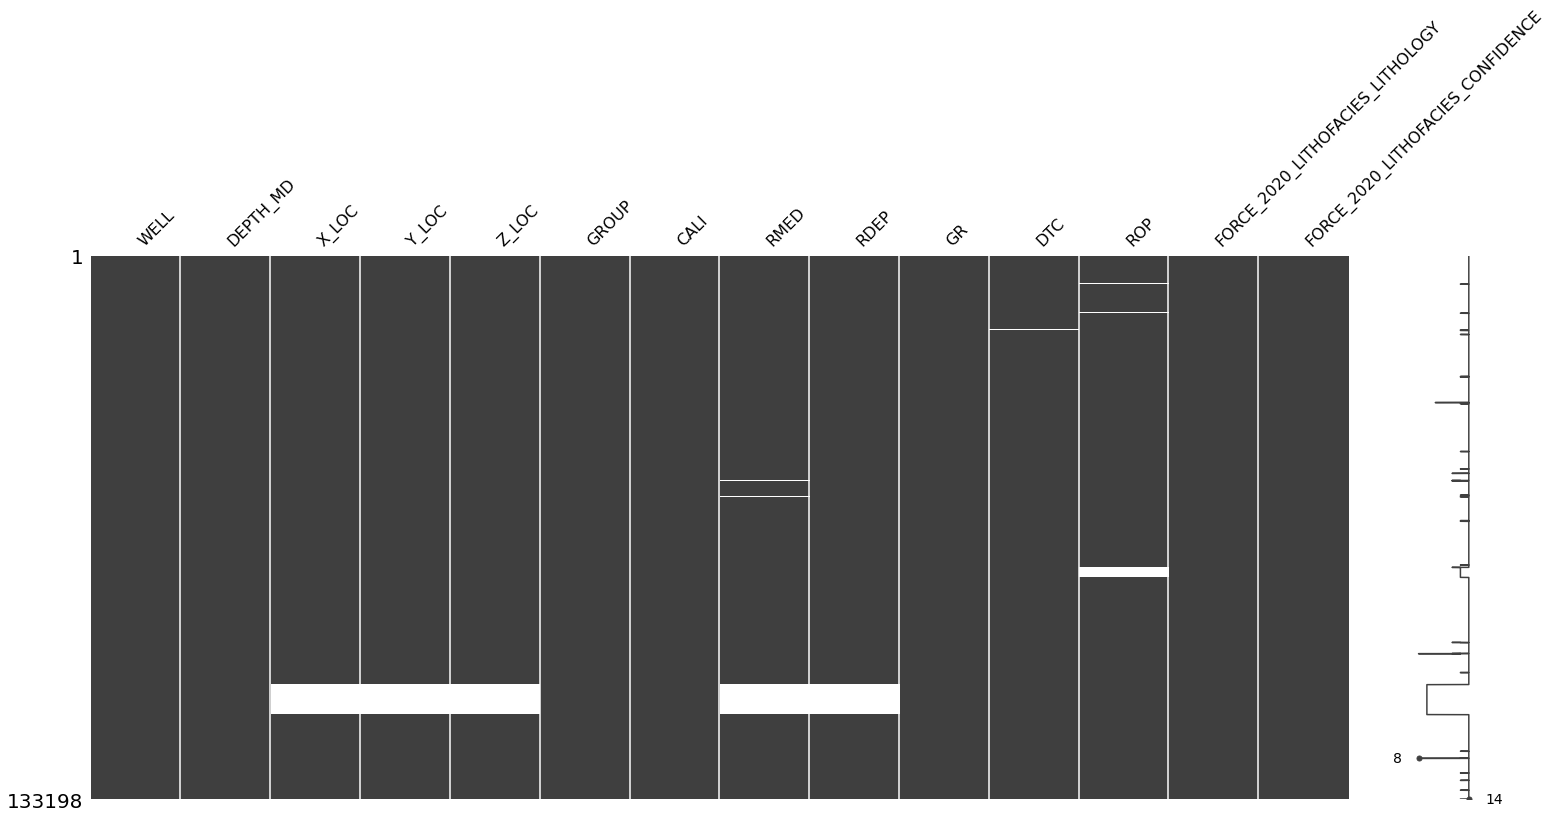

In [ ]:
# looking for columns with atleast 90% data
msno.matrix(data,filter='top',p=0.9)

No handles with labels found to put in legend.


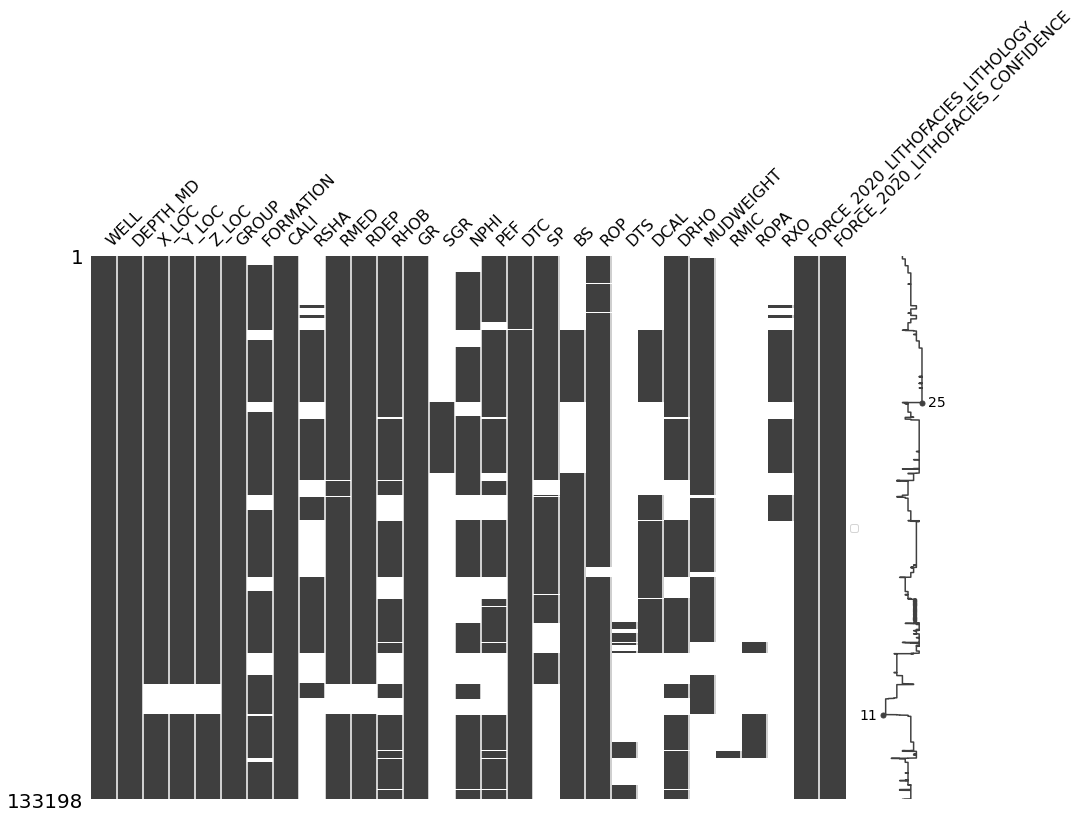

In [ ]:
msno.matrix(data, figsize=(15,10), sparkline=True, p=0);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

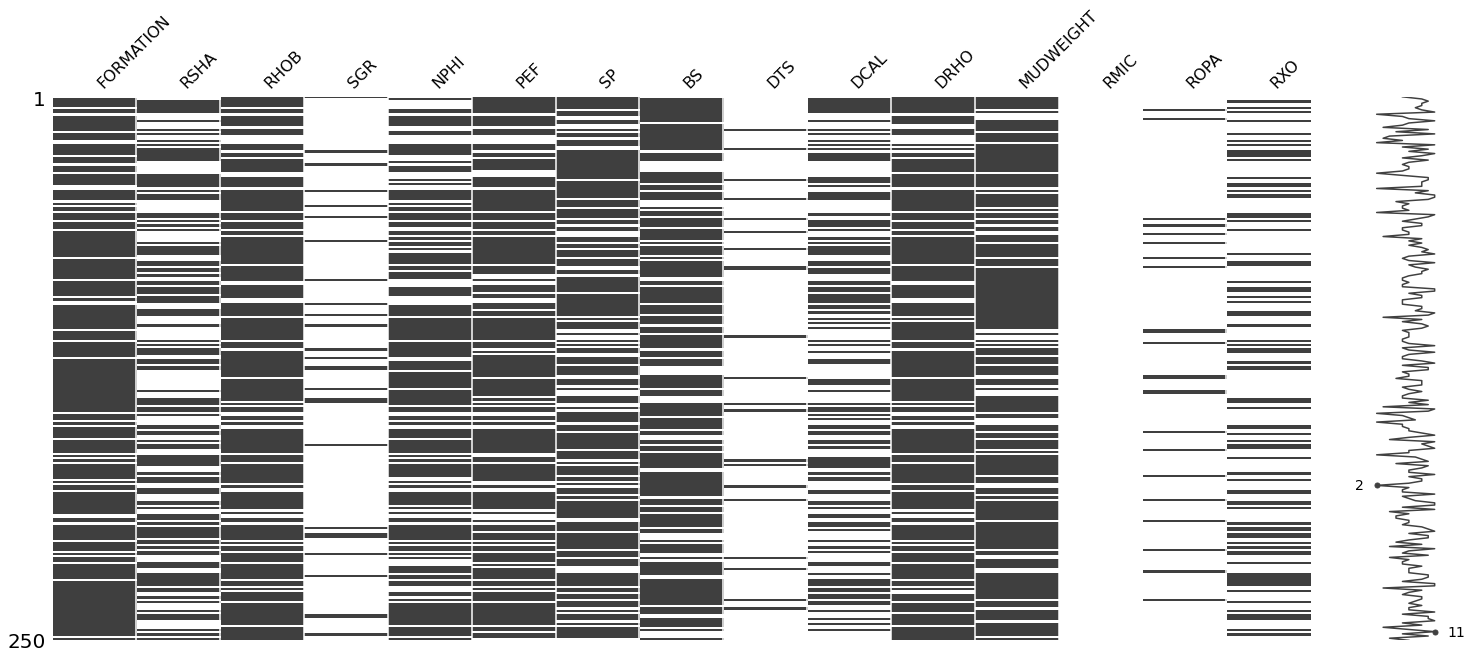

In [ ]:
filtered_data = msno.nullity_filter(data, filter='bottom', n=15, p=0.999) # or filter='top'
msno.matrix(filtered_data.sample(250))

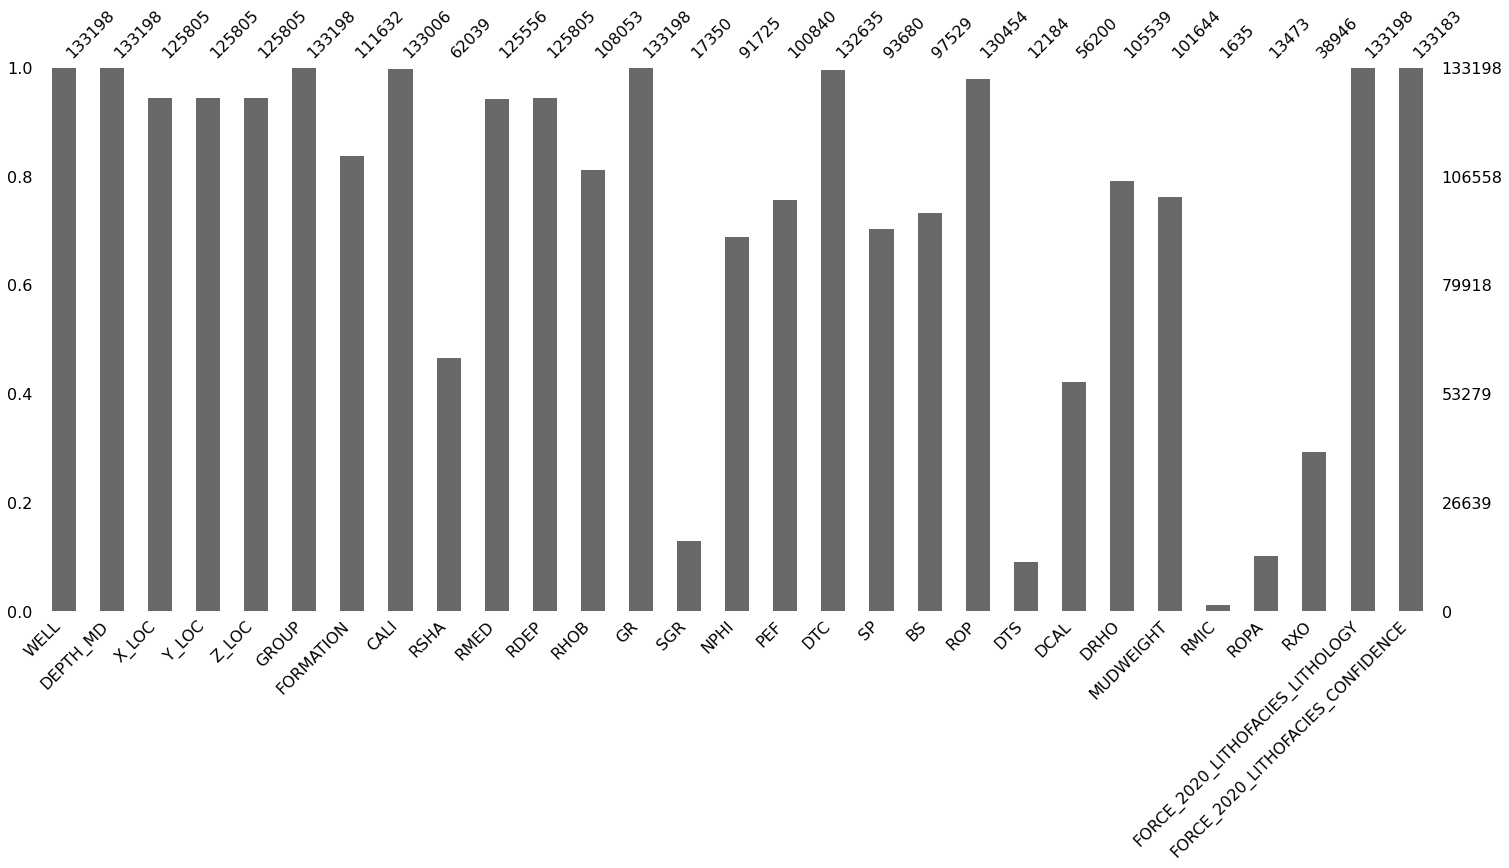

In [ ]:
msno.bar(data)

CALI 0
BS 1
GR 2
NPHI 3
RHOB 4
PEF 5
RDEP 6
RMED 7
DTC 8
DTS 9


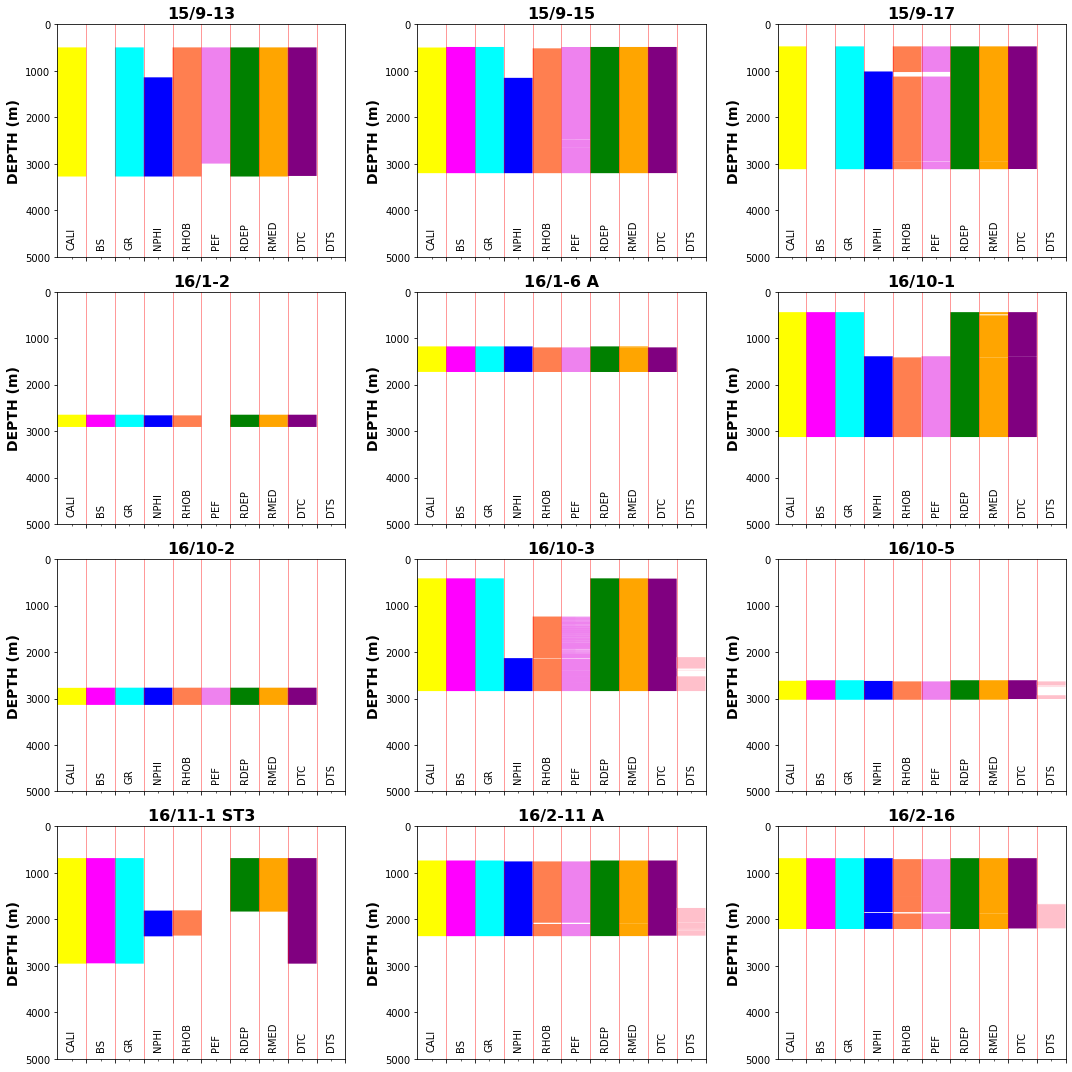

In [ ]:
data_nan = data[['WELL','DEPTH_MD','CALI', 'BS', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']].copy()
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num) #Print out the col name and number to verify it works
grouped = data_nan.groupby('WELL')
#Setup the labels we want to display on the x-axis
labels = ['CALI', 'BS', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']
#Setup the figure and the subplots
fig, axs = plt.subplots(4, 3, figsize=(15,15))
#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,9)
    
    #Setup the depth range
    ax.set_ylim(5000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor='yellow')
    ax.fill_betweenx(df.DEPTH_MD, 1, df.BS, facecolor='magenta')
    ax.fill_betweenx(df.DEPTH_MD, 2, df.GR, facecolor='cyan')
    ax.fill_betweenx(df.DEPTH_MD, 3, df.NPHI, facecolor='blue')
    ax.fill_betweenx(df.DEPTH_MD, 4, df.RHOB, facecolor='coral')
    ax.fill_betweenx(df.DEPTH_MD, 5, df.PEF, facecolor='violet')
    ax.fill_betweenx(df.DEPTH_MD, 6, df.RDEP, facecolor='green')
    ax.fill_betweenx(df.DEPTH_MD, 7, df.RMED, facecolor='orange')
    ax.fill_betweenx(df.DEPTH_MD, 8, df.DTC, facecolor='purple')
    ax.fill_betweenx(df.DEPTH_MD, 9, df.DTS, facecolor='pink')
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='red')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 , 7.5, 8.5, 9.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')
plt.savefig('missingdata.png')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()

In [ ]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [ ]:
data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)

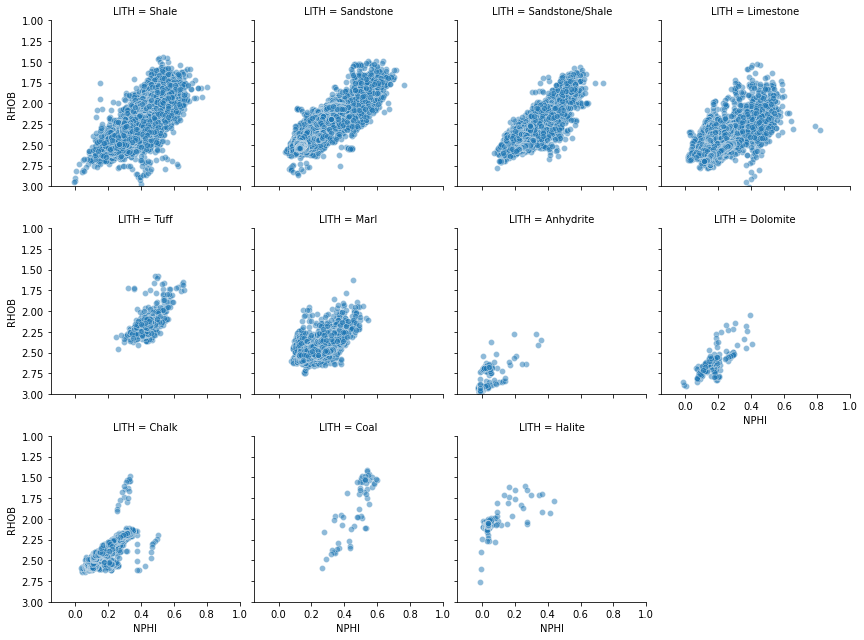

In [ ]:
g = sns.FacetGrid(data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

In [ ]:
g = sns.FacetGrid(data, col='WELL', hue='LITH', col_wrap=4,palette='Set1')
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='o')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

NameError: ignored

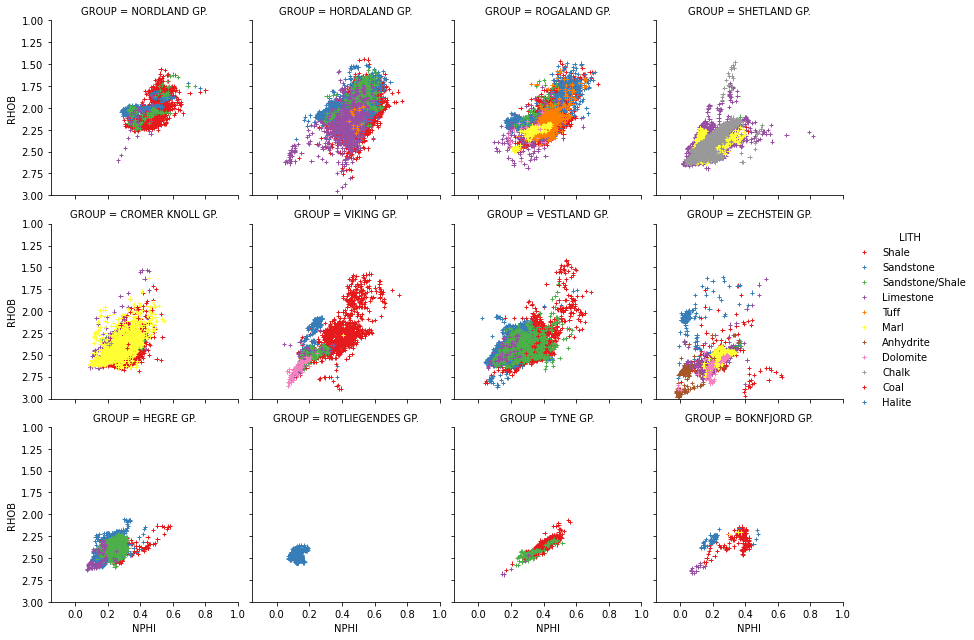

In [ ]:
g = sns.FacetGrid(data, col='GROUP', hue='LITH', col_wrap=4,palette='Set1')
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

In [ ]:
key_logs = ['CALI', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']

In [ ]:
subset = data[key_logs]
subset = subset.dropna()

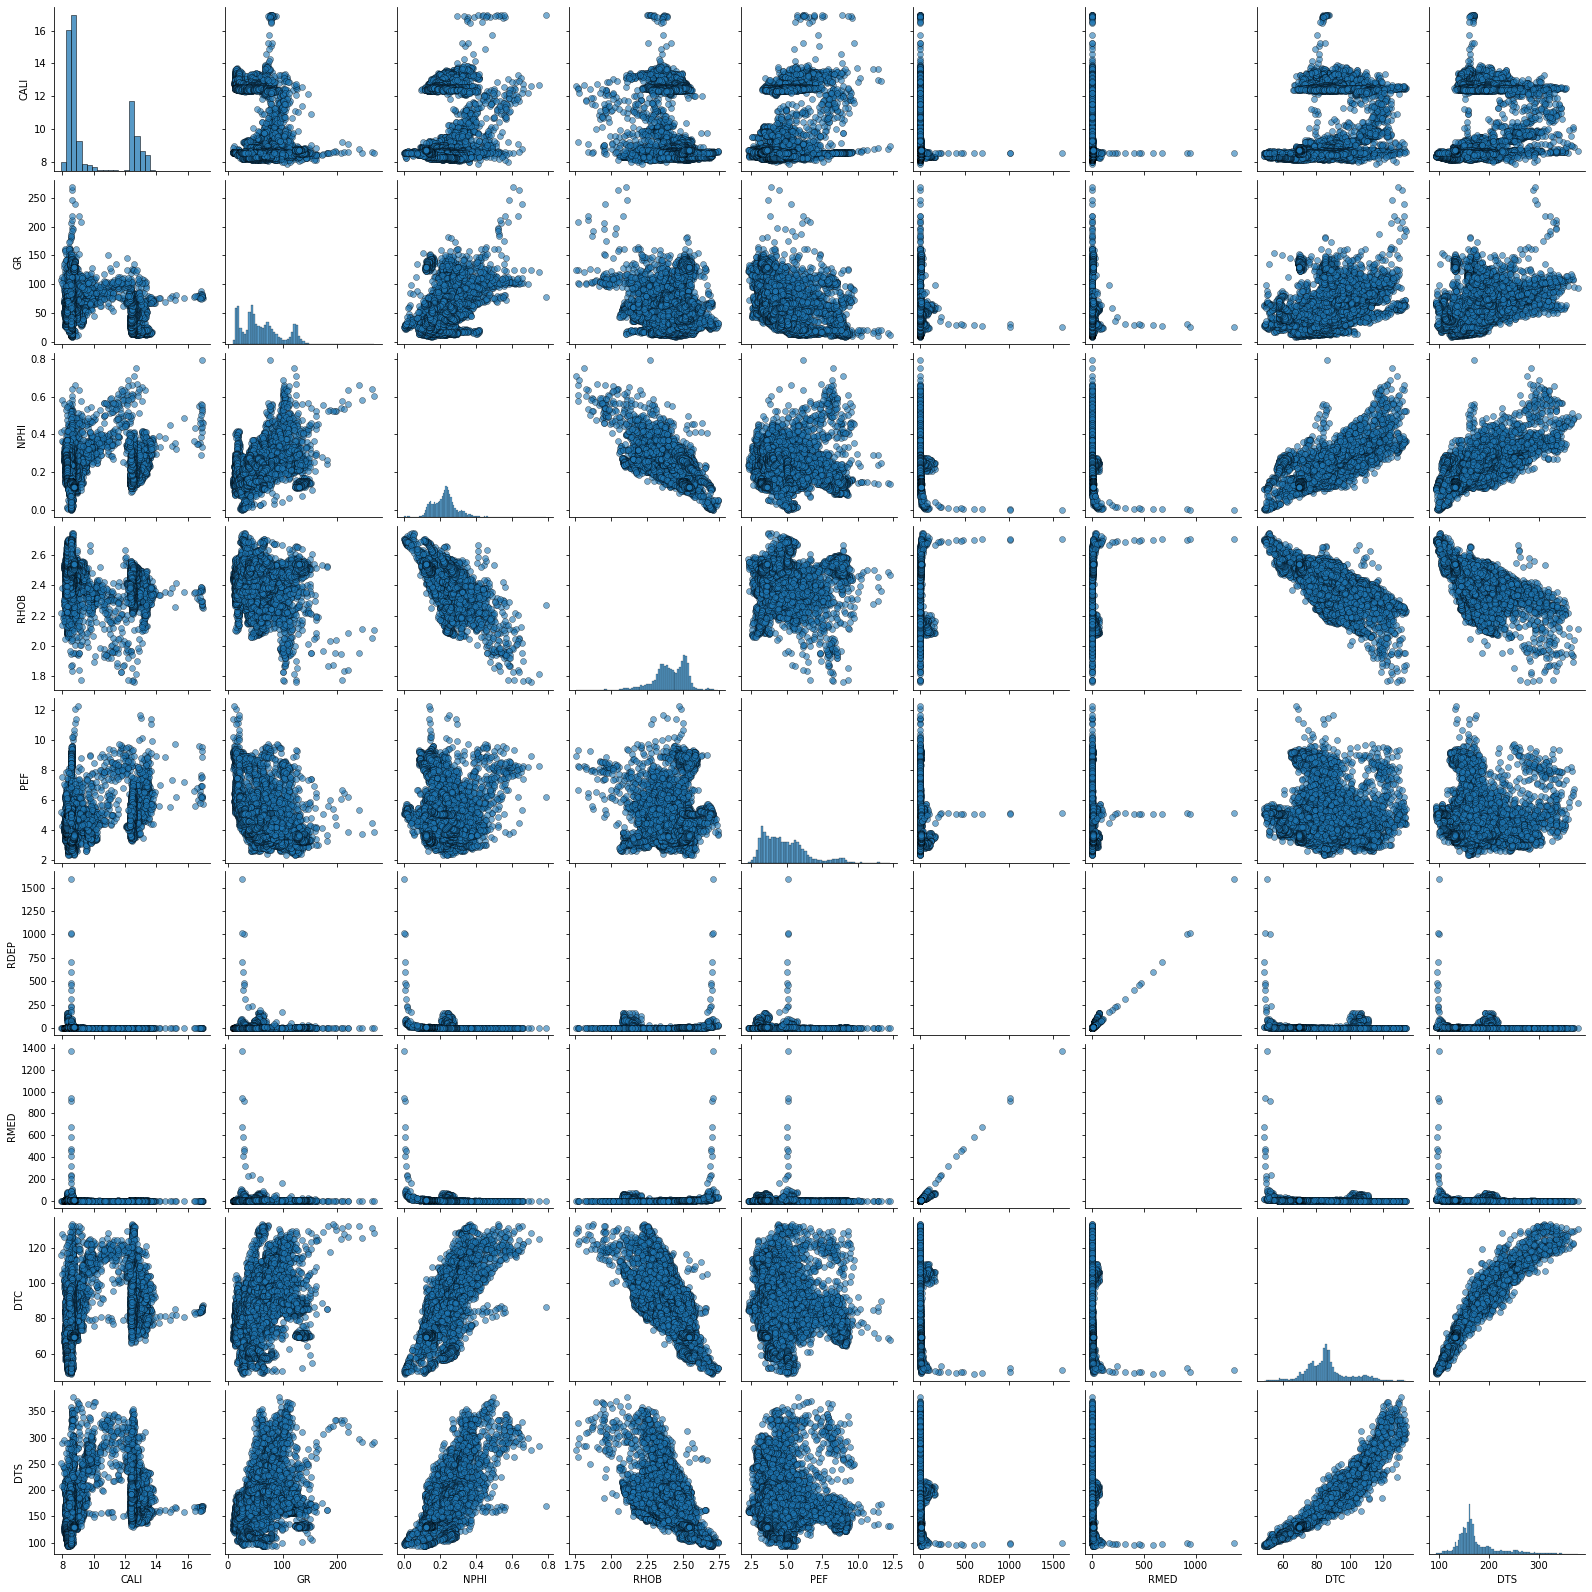

In [ ]:
sns.pairplot(subset, vars=key_logs, diag_kind='hist', plot_kws={'alpha':0.6, 'edgecolor':'k'},palette='Set2')

In [ ]:
data['DIF_CAL'] = data['CALI'] - data['BS']

In [ ]:
grouped = data.groupby('WELL')

In [ ]:
nrows = int(math.ceil(len(grouped)/3.))

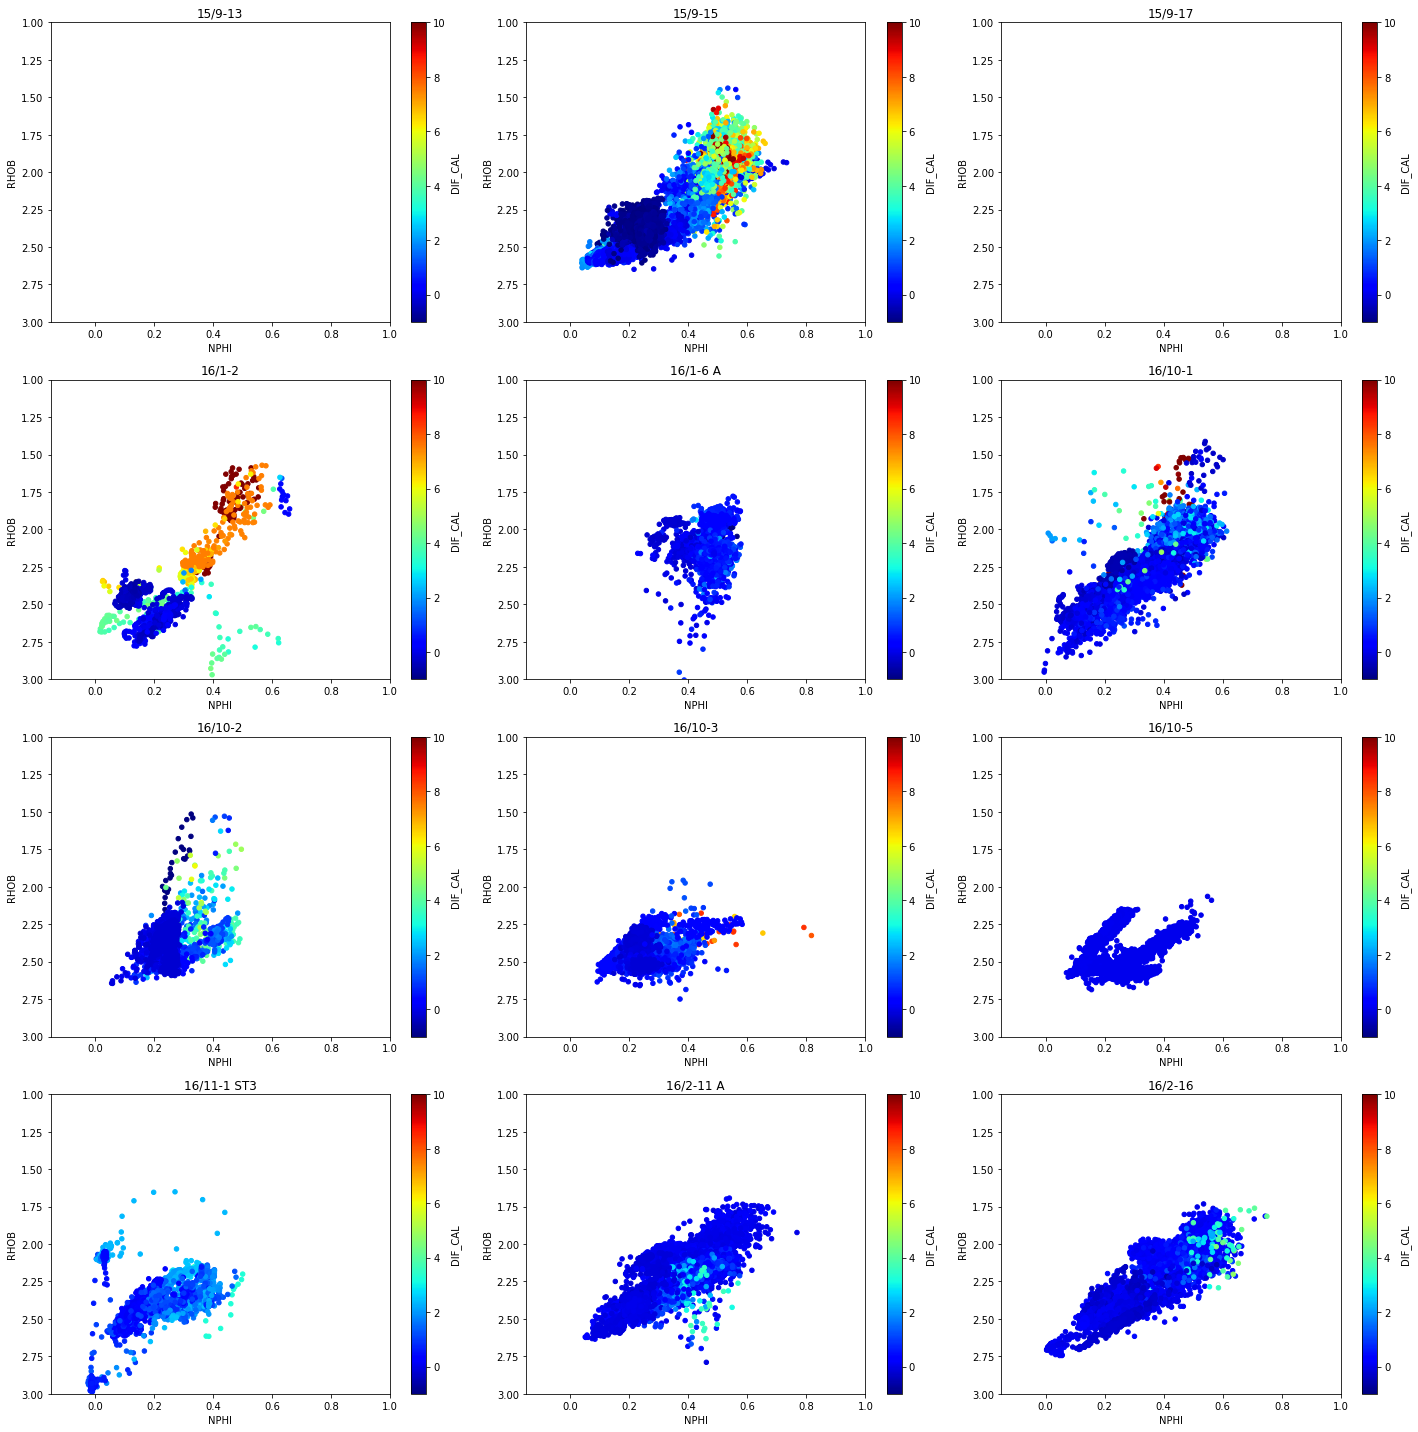

In [ ]:
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='DIF_CAL', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

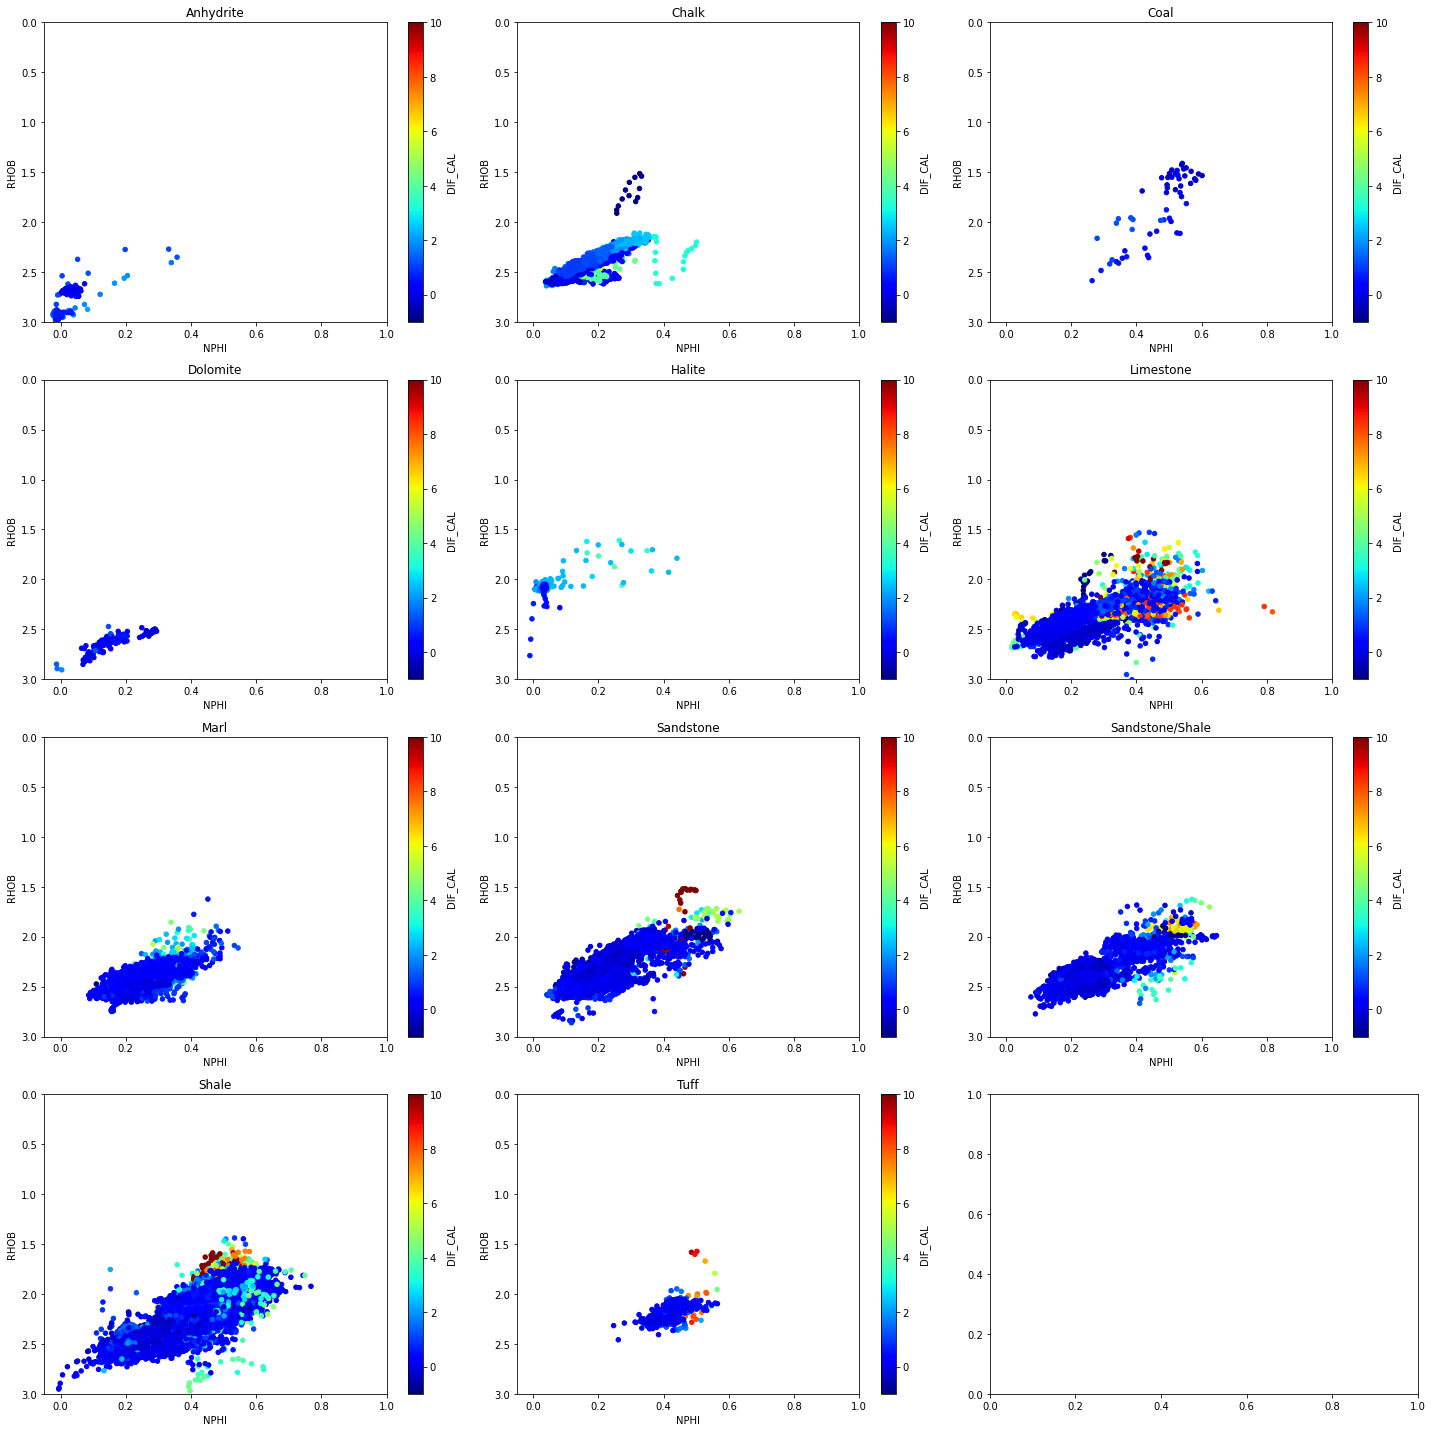

In [ ]:
# Determine number of rows
nrows = int(math.ceil(len(grouped)/3.))
# Group our data
grouped_lith = data.groupby('LITH')
# Plot our data
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', c='DIF_CAL', cmap='jet', ax=ax, vmin=-1, vmax=10)
    ax.set_xlim(-0.05,1)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()